In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing

SF_Permits = pd.read_csv("/Users/sachingupta/Documents/Reetika docs/Datasets/Building_Permits.csv")
kickstarters_2017 = pd.read_csv("/Users/sachingupta/Documents/Reetika docs/Datasets/ks-projects-201801.csv")
earthquakes = pd.read_csv("/Users/sachingupta/Documents/Reetika docs/Datasets/database.csv")
missing_values_count_sf = SF_Permits.isnull().sum()
print(missing_values_count_sf)
print(kickstarters_2017)
print(earthquakes.head())

/Users/sachingupta/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [23]:
# how many total missing values do we have?
total_cells_sf = np.product(SF_Permits.shape)
total_missing_sf = missing_values_count_sf.sum()

# percent of data that is missing
percentage_missign_values_sf = (total_missing_sf/total_cells_sf) * 100

In [3]:
print(percentage_missign_values_sf)

26.26002315058403


In [4]:
print(SF_Permits['Street Number Suffix'])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
198870    NaN
198871    NaN
198872    NaN
198873    NaN
198874    NaN
198875    NaN
198876    NaN
198877    NaN
198878    NaN
198879    NaN
198880    NaN
198881    NaN
198882    NaN
198883    NaN
198884    NaN
198885    NaN
198886    NaN
198887    NaN
198888    NaN
198889    NaN
198890    NaN
198891    NaN
198892    NaN
198893    NaN
198894    NaN
198895    NaN
198896    NaN
198897    NaN
198898    NaN
198899    NaN
Name: Street Number Suffix, Length: 198900, dtype: object


In [5]:
SF_Permits['Street Number Suffix'].isnull().sum()

196684

In [7]:
print(SF_Permits['Zipcode'])

0         94102.0
1         94102.0
2         94109.0
3         94109.0
4         94102.0
5         94107.0
6         94122.0
7         94124.0
8         94117.0
9         94117.0
10        94114.0
11        94102.0
12        94114.0
13        94131.0
14        94115.0
15        94108.0
16        94104.0
17        94114.0
18        94123.0
19        94114.0
20        94117.0
21        94110.0
22        94133.0
23        94123.0
24        94123.0
25        94122.0
26        94121.0
27        94117.0
28        94122.0
29        94102.0
           ...   
198870    94109.0
198871    94117.0
198872    94114.0
198873    94110.0
198874    94131.0
198875    94102.0
198876    94117.0
198877    94112.0
198878    94110.0
198879    94112.0
198880    94122.0
198881    94133.0
198882    94112.0
198883    94102.0
198884    94103.0
198885    94116.0
198886        NaN
198887        NaN
198888        NaN
198889        NaN
198890        NaN
198891        NaN
198892        NaN
198893        NaN
198894    

In [8]:
SF_Permits['Zipcode'].isnull().sum()

1716

# Drop Missing Values

In [9]:
SF_Permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [11]:
# Now try removing all the columns with empty values
#print("Columns in original sf dataset: %d \n" % SF_Permits.shape[1])
#columns_with_na_dropped_sf = SF_Permits.dropna(axis=1)
#print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original sf dataset: 43 



NameError: name 'columns_with_na_dropped' is not defined

In [12]:
columns_with_na_dropped = SF_Permits.dropna(axis=1)
columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [13]:
# Now try removing all the columns with empty values
print("Columns in original sf dataset: %d \n" % SF_Permits.shape[1])
columns_with_na_dropped_sf = SF_Permits.dropna(axis=1)
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original sf dataset: 43 

Columns with na's dropped: 12


# Filling in missing values

In [14]:
missing_values_count_sf

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [15]:
subset_sf_data = SF_Permits.loc[:, 'Street Number Suffix': 'Unit'].head()
subset_sf_data

,Street Number Suffix,Street Name,Street Suffix,Unit
0,NaN,Ellis,St,NaN
1,NaN,Geary,St,0.0
2,NaN,Pacific,Av,NaN
3,NaN,Pacific,Av,0.0
4,NaN,Market,St,NaN


In [16]:
subset_sf_data.fillna(method = 'bfill', axis=0).fillna(0)

,Street Number Suffix,Street Name,Street Suffix,Unit
0,0.0,Ellis,St,0.0
1,0.0,Geary,St,0.0
2,0.0,Pacific,Av,0.0
3,0.0,Pacific,Av,0.0
4,0.0,Market,St,0.0


In [18]:
SF_Permits['Zipcode']

0         94102.0
1         94102.0
2         94109.0
3         94109.0
4         94102.0
5         94107.0
6         94122.0
7         94124.0
8         94117.0
9         94117.0
10        94114.0
11        94102.0
12        94114.0
13        94131.0
14        94115.0
15        94108.0
16        94104.0
17        94114.0
18        94123.0
19        94114.0
20        94117.0
21        94110.0
22        94133.0
23        94123.0
24        94123.0
25        94122.0
26        94121.0
27        94117.0
28        94122.0
29        94102.0
           ...   
198870    94109.0
198871    94117.0
198872    94114.0
198873    94110.0
198874    94131.0
198875    94102.0
198876    94117.0
198877    94112.0
198878    94110.0
198879    94112.0
198880    94122.0
198881    94133.0
198882    94112.0
198883    94102.0
198884    94103.0
198885    94116.0
198886        NaN
198887        NaN
198888        NaN
198889        NaN
198890        NaN
198891        NaN
198892        NaN
198893        NaN
198894    

# Normalization

In [27]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0
print(index_of_positive_pledges)

0         False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10        False
11         True
12        False
13        False
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26        False
27         True
28         True
29         True
          ...  
378631     True
378632    False
378633     True
378634     True
378635     True
378636     True
378637     True
378638     True
378639     True
378640     True
378641    False
378642     True
378643    False
378644     True
378645     True
378646     True
378647     True
378648     True
378649     True
378650    False
378651     True
378652     True
378653     True
378654     True
378655    False
378656     True
378657     True
378658     True
378659     True
378660     True
Name: usd_pledged_real, 

In [28]:
# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]
print(positive_pledges)

1           2421.00
2            220.00
3              1.00
4           1283.00
5          52375.00
6           1205.00
7            453.00
8           8233.00
9           6240.57
11         12700.00
14        121857.33
15           664.00
16           395.00
17           789.00
18           250.00
19          1781.00
20         34268.00
21             0.81
22           650.00
23             6.29
24           701.66
25         15827.00
27         42174.03
28           160.60
29         57577.31
30            31.09
31         47266.00
32          1427.35
33          1395.00
34         13260.00
            ...    
378625      4005.00
378626        50.00
378627      1723.53
378629      2090.00
378630      1920.56
378631     13861.50
378633     11643.00
378634      3531.00
378635        70.00
378636      4686.96
378637     10245.00
378638        18.00
378639      5579.00
378640       100.00
378642      1452.47
378644      6169.00
378645      4374.99
378646      1732.02
378647       980.00


/Users/sachingupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sachingupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalized data')

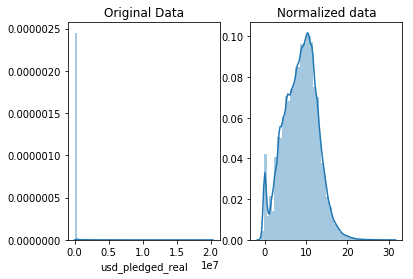

In [29]:
# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

# Parsing Dates

In [31]:
print(earthquakes['Date'].head())

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object


In [32]:
earthquakes['Date'].dtype

dtype('O')

In [33]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)

In [34]:
earthquakes['date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

In [35]:
# get the day of the month from the date_parsed column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
print(day_of_month_earthquakes.head())

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int64


/Users/sachingupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


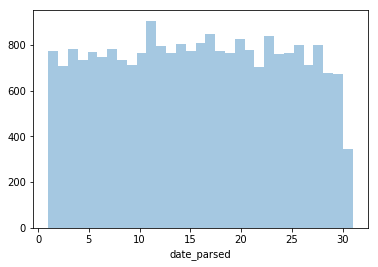

In [36]:
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

# Scaling with sklearn

In [40]:
scaler = preprocessing.MinMaxScaler()

dfTest = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(dfTest[col])),columns=[col])
    return df

In [41]:
dfTest

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [42]:
scaled_df = scaleColumns(dfTest,['A','B'])
scaled_df

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.628645,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small
